# Importing the required libraries

In [28]:
import time

# For loading data and data manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# For cleaning the text
from nltk.corpus import stopwords
from nltk import RegexpTokenizer
from nltk.stem import WordNetLemmatizer

# For data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# For preprocessing and modelling
import tensorflow as tf

# Loading the data

In [6]:
df = pd.read_csv("twitter_tweets.csv", encoding="ISO-8859-1", names=["target", "ids", "date", "flag", "user", "text"])
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [8]:
required_columns = ["text", "target"]
df = df[required_columns]
df.head()

,text,target
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


# Getting one with the data

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   text    1600000 non-null  object
 1   target  1600000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


In [30]:
df.describe()

,target
count,1.600000e+06
mean,2.000000e+00
std,2.000001e+00
min,0.000000e+00
25%,0.000000e+00
50%,2.000000e+00
75%,4.000000e+00
max,4.000000e+00


In [36]:
df.shape

(1600000, 2)

### Rename the target values from 0, 4 to negative, positive

In [31]:
df['target'] = df['target'].replace([0, 4], ['negative', 'positive'])

### Plot the graph to count the positive and negative sentiment tweets

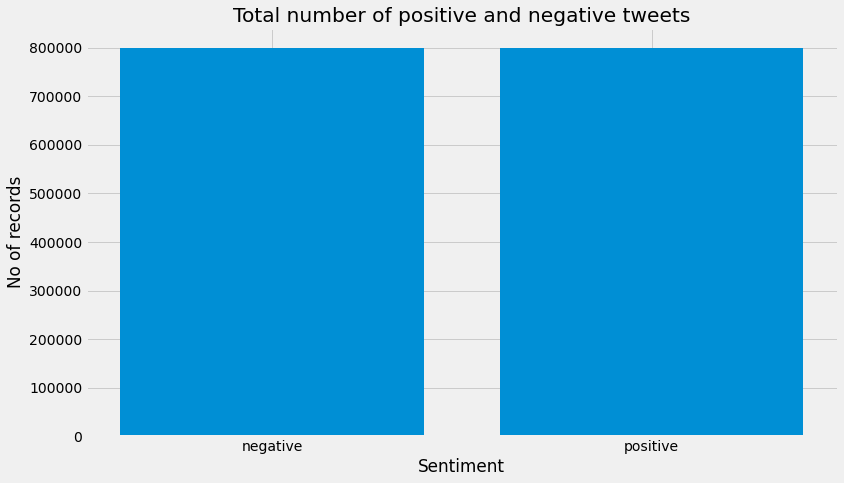

In [32]:
plt.figure(figsize=(12, 7))
plt.bar(df['target'].value_counts().index, df['target'].value_counts().values)
plt.title('Total number of positive and negative tweets')
plt.xlabel('Sentiment')
plt.ylabel('No of records')
plt.show()

# Check for the null records and remove them

In [33]:
df.isnull().sum()

text      0
target    0
dtype: int64

# Check for the duplicate records and remove them

In [35]:
df[df.duplicated()]

,text,target
1940,and so the editing of 3000 wedding shots begins,negative
2149,"im lonely keep me company! 22 female, california",negative
3743,I'm not liking that new iTunes Pricing at all....,negative
3746,"cant eat, drink or breath properly thanks to t...",negative
4163,has a cold,negative
...,...,...
1599450,Good morning!,positive
1599501,getting used to twitter,positive
1599531,@KhloeKardashian Definitely my Mom. And Angeli...,positive
1599678,goodmorning,positive


In [39]:
df.drop_duplicates(inplace=True)

In [40]:
df.shape

(1583691, 2)